# Data Programming Project 1 
**By:** 
* Subramanian Arumugam : sarumugam2@student.gsu.edu
* Abinesh Ganesan : ag1@student.gsu.edu
* Drona Charyulu Ronanki : dronanki1@student.gsu.edu
* Shraddha Joshi : sjoshi22@student.gsu.edu
* Tasleem Syed : tsyed1@student.gsu.edu

In [82]:
#importing the required libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support as score
import numpy
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")

pd.set_option("display.max_rows", None)

#reading the dataset
df = pd.read_csv("dataset.csv")
df1 = df.dropna(axis=1, how = 'all')

## Project 1 Question (1)
Show overall descriptive statistics of your dataset; number of data points, number of
descriptive features, type of features, your target feature and its type, descriptive features
for different target feature values.

In [83]:
# The categorical features are:
categorical_columns = ["gender","ethnicity","icu_admit_source","apache_2_bodysystem",
                       "apache_3j_bodysystem","gcs_eyes_apache","gcs_motor_apache",
                       "diabetes_mellitus","arf_apache","cirrhosis",
                       "gcs_unable_apache","gcs_verbal_apache","hepatic_failure",
                       "icu_admit_source","immunosuppression","intubated_apache",
                       "leukemia","lymphoma","solid_tumor_with_metastasis",
                       "ventilated_apache", "aids","apache_post_operative", "icu_stay_type", "icu_type", "elective_surgery"]

# The numerical features are:
numeric_cols = ["apache_2_diagnosis","apache_3j_diagnosis","apache_4a_hospital_death_prob","apache_4a_icu_death_prob",
"bmi","d1_diasbp_max","d1_diasbp_min","d1_diasbp_noninvasive_max",
"d1_diasbp_noninvasive_min","d1_glucose_max","d1_glucose_min",
"d1_heartrate_max","d1_heartrate_min","d1_mbp_max","d1_mbp_min","d1_mbp_noninvasive_max",
"d1_mbp_noninvasive_min","d1_potassium_max","d1_potassium_min","d1_resprate_max","d1_resprate_min",
"d1_spo2_max","d1_spo2_min","d1_sysbp_max","d1_sysbp_min","d1_sysbp_noninvasive_max","d1_sysbp_noninvasive_min",
"d1_temp_max","d1_temp_min","h1_diasbp_max","h1_diasbp_min","h1_diasbp_noninvasive_max",
"h1_diasbp_noninvasive_min","h1_heartrate_max","h1_heartrate_min","h1_mbp_max","h1_mbp_min",
"h1_mbp_noninvasive_max","h1_mbp_noninvasive_min","h1_resprate_max","h1_resprate_min","h1_spo2_max",
"h1_spo2_min","h1_sysbp_max","h1_sysbp_min","h1_sysbp_noninvasive_max","h1_sysbp_noninvasive_min",
"heart_rate_apache","height","map_apache","resprate_apache","temp_apache","weight", "age", "pre_icu_los_days"]

target_column = "hospital_death"

print("The total number of data points are: " + str(df1.shape[0]))
print("The total number of columns are: " + str(df1.shape[1]))
print("The number of Categorical features are: " + str(len(categorical_columns)))
print("The number of Numerical features are: " + str(len(numeric_cols)))
print("The Target Column is : " + str(target_column) + " and the target values are 0 and 1.")
print("The 0 in Hospital Death refers that the Patient survived and 1 refers that the patient didn't survive")

df1.hospital_death.value_counts()


The total number of data points are: 91713
The total number of columns are: 84
The number of Categorical features are: 25
The number of Numerical features are: 55
The Target Column is : hospital_death and the target values are 0 and 1.
The 0 in Hospital Death refers that the Patient survived and 1 refers that the patient didn't survive


0    83798
1     7915
Name: hospital_death, dtype: int64

**Displaying the data types of the datset.

In [3]:
dtype_df = pd.DataFrame(df1.dtypes)
dtype_df.reset_index()

,index,0
0,encounter_id,int64
1,patient_id,int64
2,hospital_id,int64
3,age,float64
4,bmi,float64
5,elective_surgery,int64
6,ethnicity,object
7,gender,object
8,height,float64
9,icu_admit_source,object


In [4]:
#Describing the data
stats_df1 = df1.describe(include = 'all').unstack().reset_index()
stats_df1.columns = ['Feature', 'Stat', 'Stat_Value']
stats_df2 = stats_df1.pivot(index = 'Feature', columns = 'Stat', values = 'Stat_Value')

In [5]:
stats_df3 = stats_df2.reset_index()
stats_df3

Stat,Feature,25%,50%,75%,count,freq,max,mean,min,std,top,unique
0,age,52.0,65.0,75.0,87485.0,NaN,89.0,62.309516,16.0,16.775119,NaN,NaN
1,aids,0.0,0.0,0.0,90998.0,NaN,1.0,0.000857,0.0,0.029265,NaN,NaN
2,apache_2_bodysystem,NaN,NaN,NaN,90051,38816,NaN,NaN,NaN,NaN,Cardiovascular,10
3,apache_2_diagnosis,113.0,122.0,301.0,90051.0,NaN,308.0,185.401739,101.0,86.050882,NaN,NaN
4,apache_3j_bodysystem,NaN,NaN,NaN,90051,29999,NaN,NaN,NaN,NaN,Cardiovascular,11
5,apache_3j_diagnosis,203.01,409.02,703.03,90612.0,NaN,2201.05,558.216377,0.01,463.266985,NaN,NaN
6,apache_4a_hospital_death_prob,0.02,0.05,0.13,83766.0,NaN,0.99,0.086787,-1.0,0.247569,NaN,NaN
7,apache_4a_icu_death_prob,0.01,0.02,0.06,83766.0,NaN,0.97,0.043955,-1.0,0.217341,NaN,NaN
8,apache_post_operative,0.0,0.0,0.0,91713.0,NaN,1.0,0.201106,0.0,0.400829,NaN,NaN
9,arf_apache,0.0,0.0,0.0,90998.0,NaN,1.0,0.027979,0.0,0.164912,NaN,NaN


**Descriptive features for each target feature value **


In [6]:
grouped_stats = df1.groupby('hospital_death').describe(include = 'all').unstack().reset_index()
grouped_stats.columns = ['Feature', 'Stat', 'Target', 'Stat_Value']
grouped_stats1 = grouped_stats.pivot(index = ['Feature', 'Target'], columns = 'Stat', values = 'Stat_Value')
grouped_stats1.reset_index()

Stat,Feature,Target,25%,50%,75%,count,freq,max,mean,min,std,top,unique
0,age,0,52.0,64.0,75.0,80212.0,NaN,89.0,61.748741,16.0,16.860137,NaN,NaN
1,age,1,60.0,71.0,80.0,7273.0,NaN,89.0,68.494156,16.0,14.428363,NaN,NaN
2,aids,0,0.0,0.0,0.0,83168.0,NaN,1.0,0.000818,0.0,0.028583,NaN,NaN
3,aids,1,0.0,0.0,0.0,7830.0,NaN,1.0,0.001277,0.0,0.035717,NaN,NaN
4,apache_2_bodysystem,0,NaN,NaN,NaN,82272,34609,NaN,NaN,NaN,NaN,Cardiovascular,10
5,apache_2_bodysystem,1,NaN,NaN,NaN,7779,4207,NaN,NaN,NaN,NaN,Cardiovascular,10
6,apache_2_diagnosis,0,113.0,123.0,302.0,82272.0,NaN,308.0,187.779488,101.0,86.334355,NaN,NaN
7,apache_2_diagnosis,1,113.0,114.0,212.0,7779.0,NaN,308.0,160.254274,101.0,78.718141,NaN,NaN
8,apache_3j_bodysystem,0,NaN,NaN,NaN,82272,27609,NaN,NaN,NaN,NaN,Cardiovascular,11
9,apache_3j_bodysystem,1,NaN,NaN,NaN,7779,2390,NaN,NaN,NaN,NaN,Cardiovascular,11


## Project 1 Question 2

Determine if any features have missing data and what should be done with the missing
data. 
Provide supporting visualizations
with their analysis.

In [7]:
missing_data= pd.DataFrame(df1.isnull().sum().reset_index())

<AxesSubplot:ylabel='Feature'>

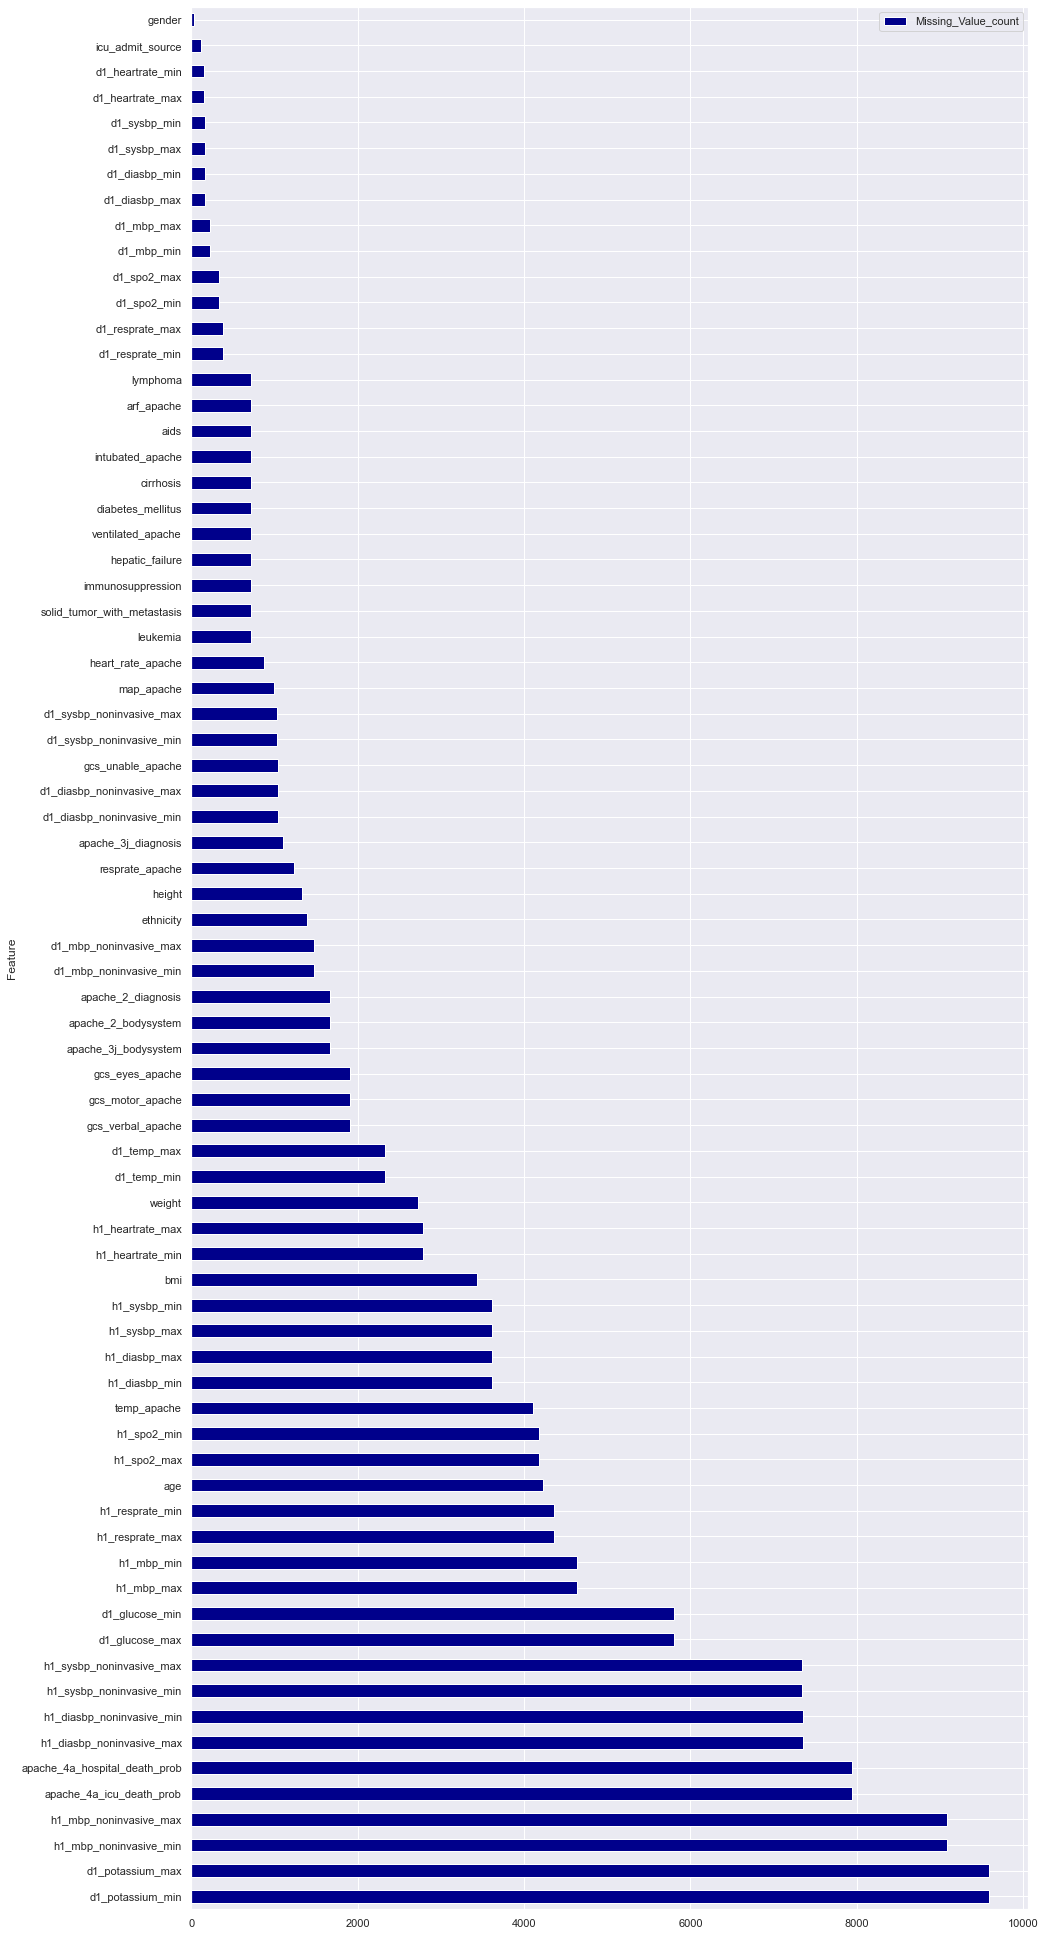

In [8]:
missing_data.columns = ['Feature', 'Missing_Value_count']
missing_data1 = missing_data.loc[missing_data.Missing_Value_count > 0]
missing_data2 = missing_data1.sort_values("Missing_Value_count", ascending = False)
missing_data2.plot(kind='barh', y='Missing_Value_count', x = 'Feature', figsize=(15,35), color='darkblue')

# Project 1 Question 3

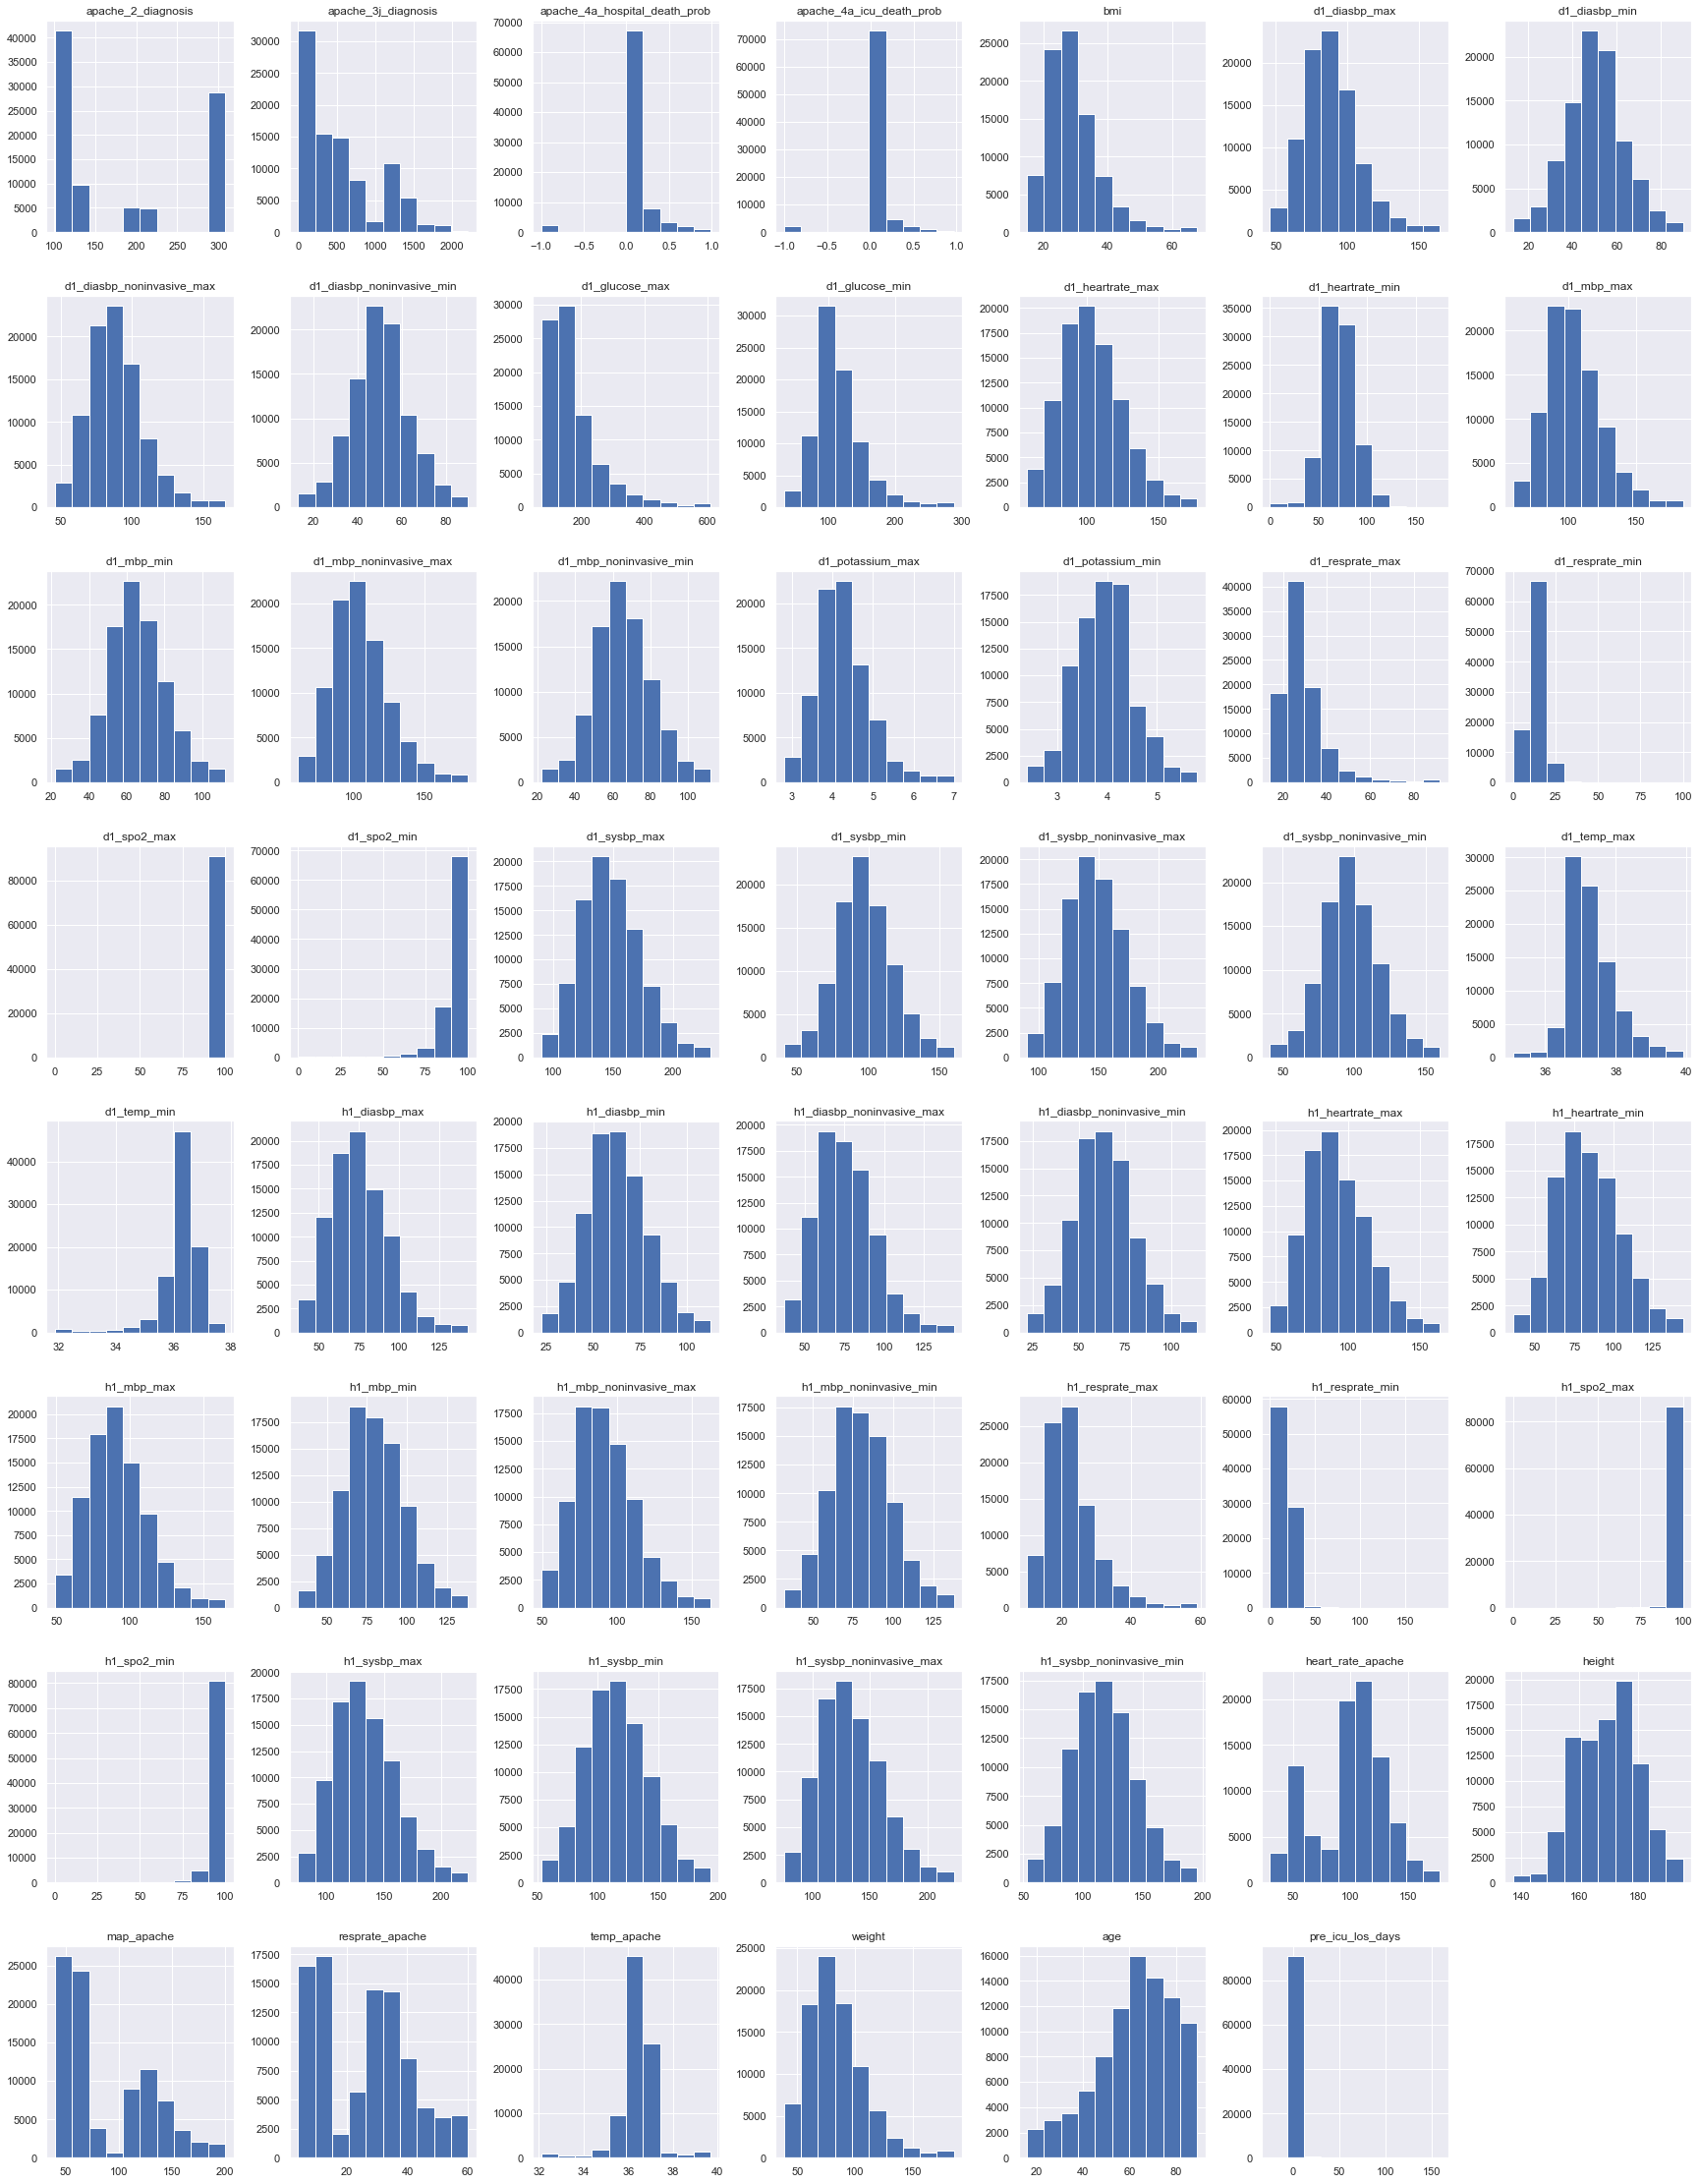

In [9]:
df1[numeric_cols].hist(figsize=(30,40),color='b')
plt.show()

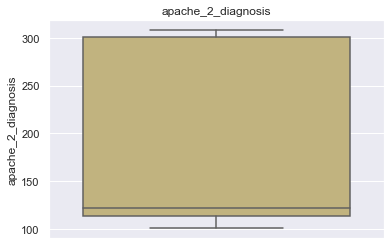

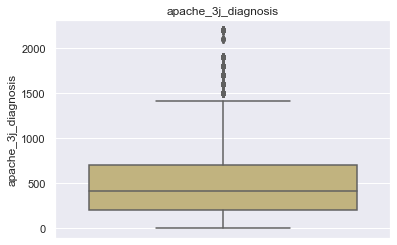

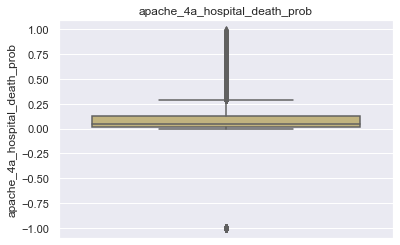

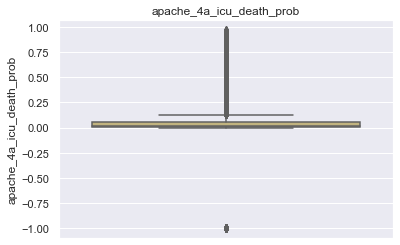

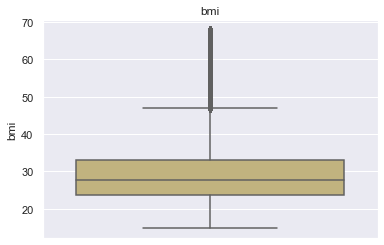

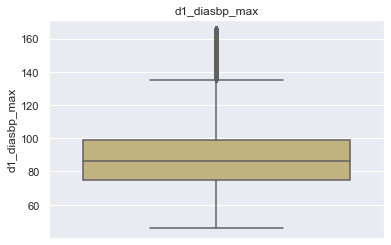

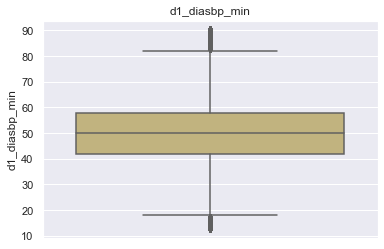

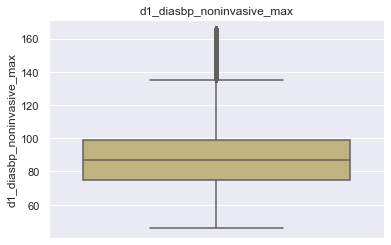

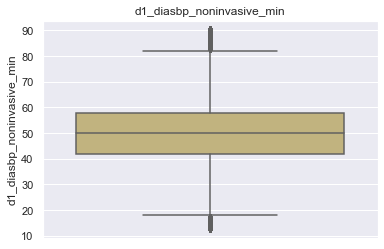

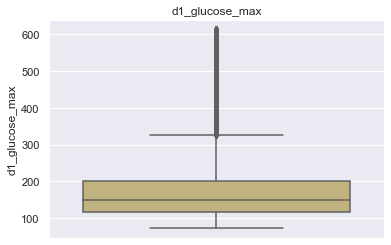

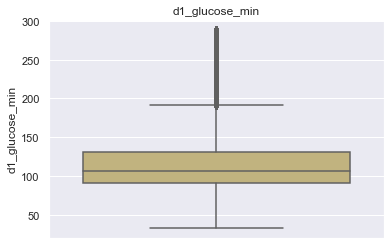

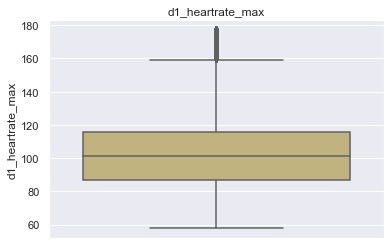

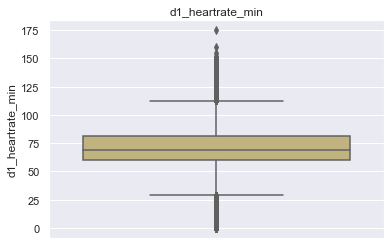

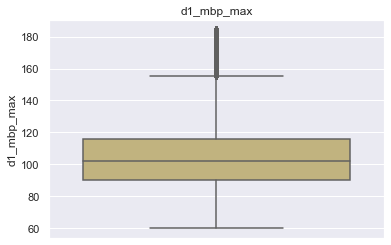

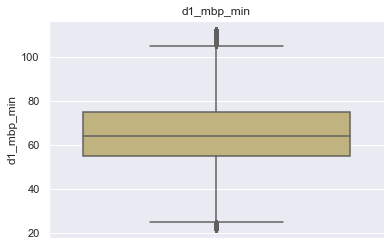

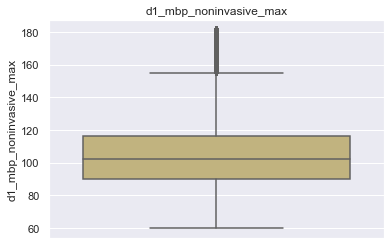

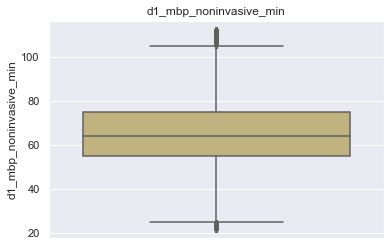

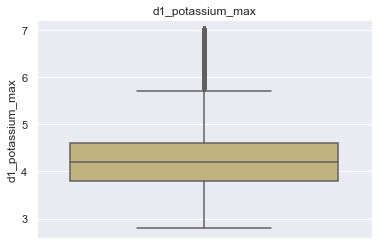

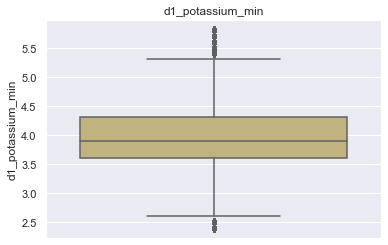

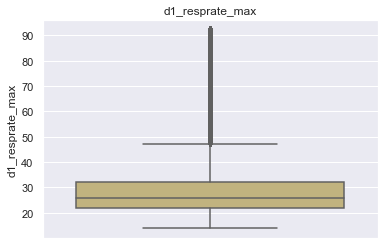

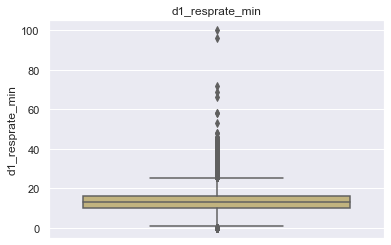

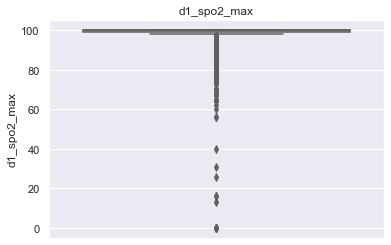

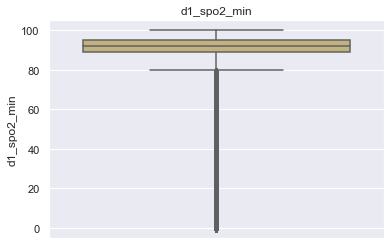

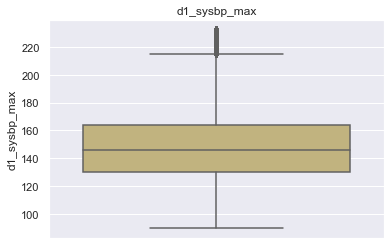

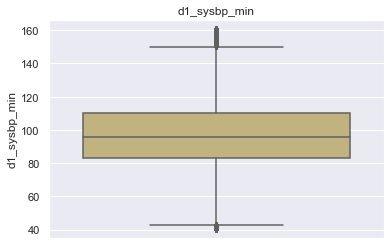

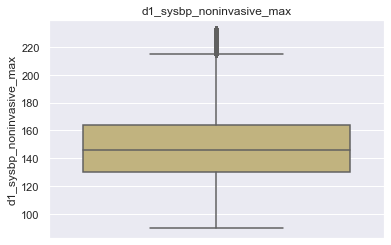

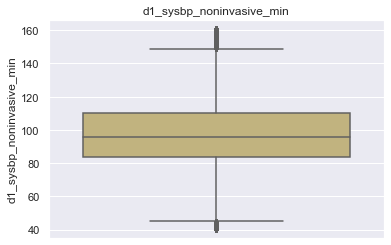

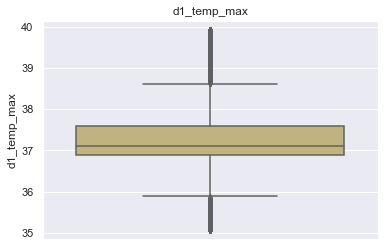

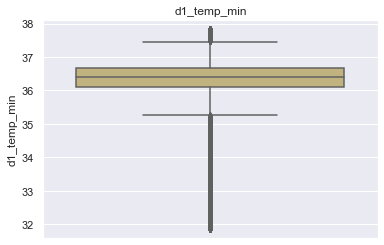

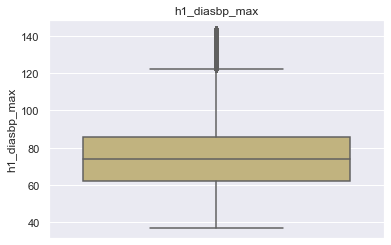

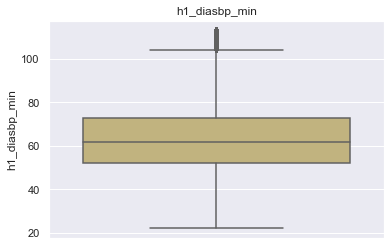

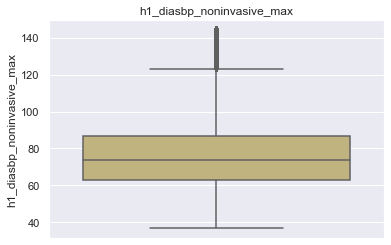

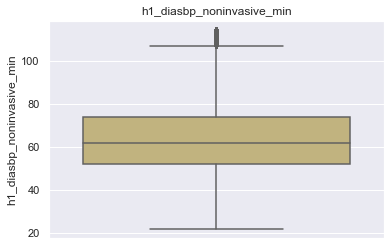

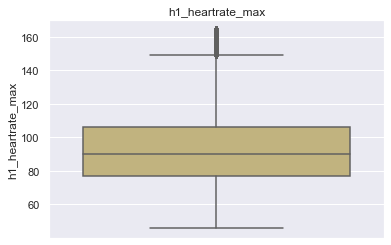

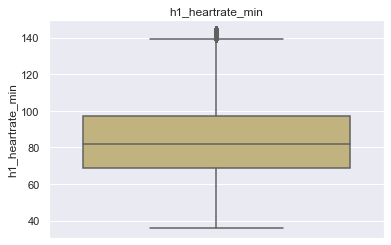

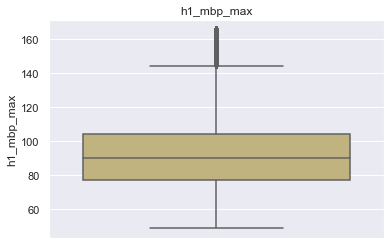

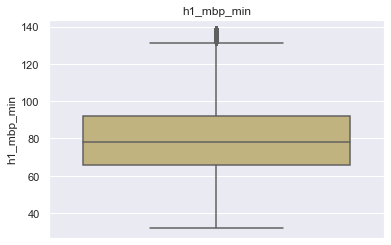

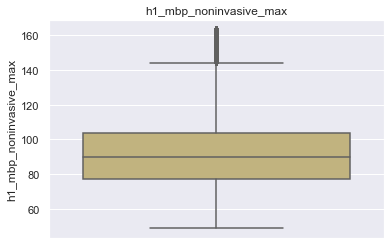

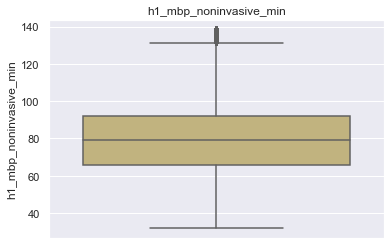

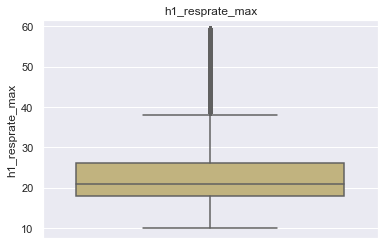

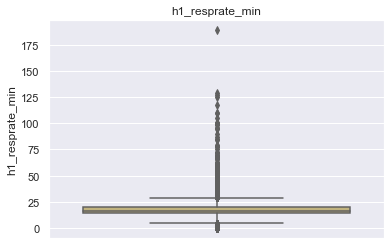

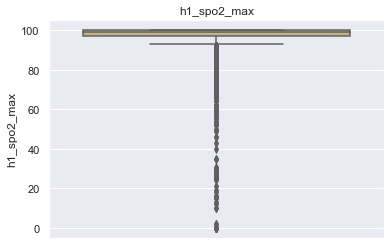

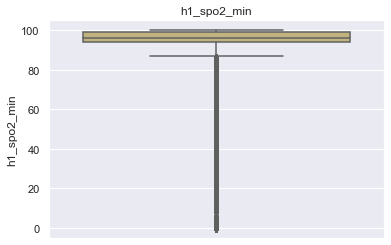

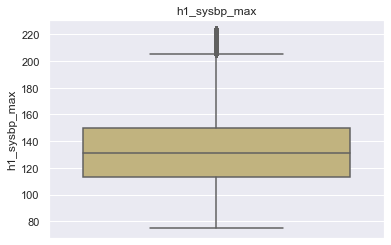

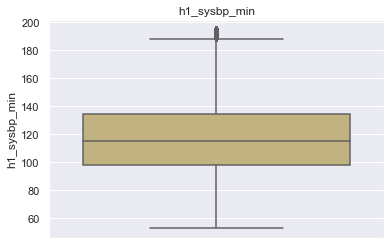

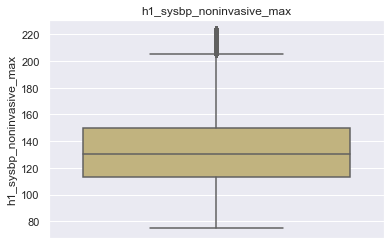

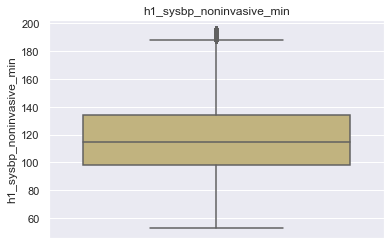

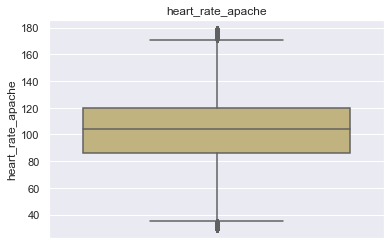

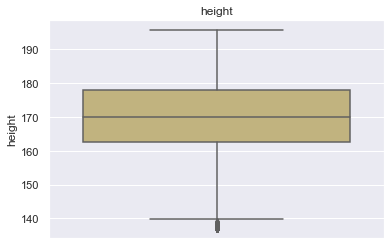

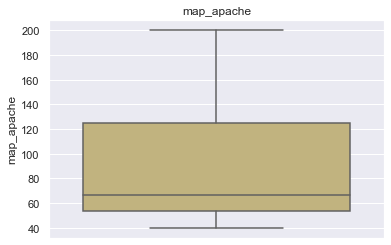

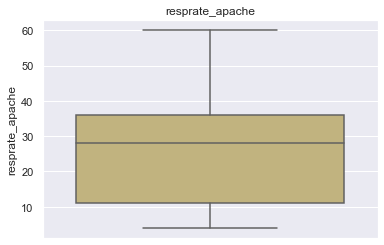

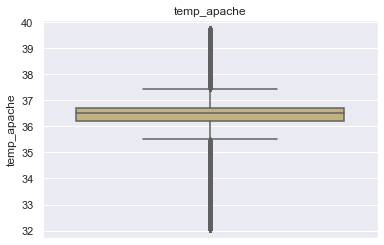

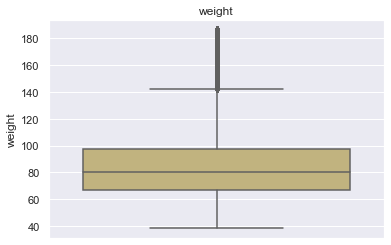

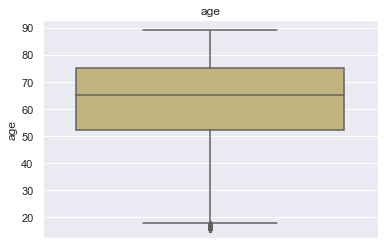

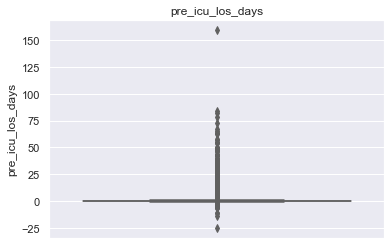

In [10]:
for feature in [feature for feature in numeric_cols]:
    sns.boxplot(data=df1, y= feature, color='y')
    plt.title(feature)
    plt.show();

# Project 1 Question 4    

The data-set contains missing values, outiers, different scales and the continous features are skewed.
Since this contains medical information like Blood test results and diagnosis information, we decided not to impute the columns with any mean/median/mode imputation approach. 

So, we decided to bin the numeric variables by providing custom bin-ranges. We decided the bin-ranges by analysing the distribution of data and created bins such a way that the skew in the data was addresses.

Also, we changed the missing value data-point to "Not-Applicable" so that the "Not-Applicable" becomes another category. We understood that missing values are an integral part to such data and decided to encode the missing value as a separate category

Our team studied the distribution of each continuos feature and came up with our own bin-ranges to bin the features.
The bin-ranges and corresponding labels are stored in the Binning Values.csv file and is read below.

In [84]:
bin_df = pd.read_csv("Binning Values.csv")

#Looping through each feature column name to bin it. The binning values dataframe contains the bin ranges and labels.
for i in range(len(bin_df)):
    col_name = bin_df.loc[i,'COLUMN']
    bin_str = bin_df.loc[i,'BINS']
    bin_list = bin_str.strip("][").replace(" ","").split(",")
    bin_list1 = [float(x) for x in bin_list]
    bin_list1[0] = bin_list1[0]-1
    labels_str = bin_df.loc[i,'LABELS']
    labels_list = labels_str.strip("][").replace(" ","").replace("'","").split(",")
    labels_list1 = [str(x) for x in labels_list]
    
    df1[col_name+"_labelled"] = pd.cut(df1[col_name], bins =bin_list1, labels = labels_list)
    df1[col_name+"_labelled"] = np.where(df1[col_name+"_labelled"].isna(), 'not_applicable', df1[col_name+"_labelled"])
    if(df1[col_name+"_labelled"].isna().sum()):
        break
    else:
        df1.drop([col_name], axis=1, inplace=True)
        
# Converting the missing values in the categorical columns to a string: Not_Applicable 
for i in range(len(categorical_columns)):
    if df1[categorical_columns[i]].isna().sum() > 0:
        df1[categorical_columns[i]]= np.where(df1[categorical_columns[i]].isna(), "Not_Applicable", df1[categorical_columns[i]])

# Binning the age variable
df1['age'] = pd.cut(df1['age'], bins =[15.000000, 22.083333, 28.166667, 34.250000, 40.333333, 46.416667,52.500000, 58.583333, 64.666667, 70.750000, 76.833333, 82.916667,89.000000])

# Project 1 Question 5

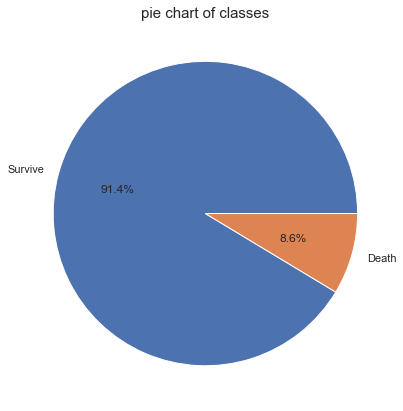

In [4]:
# Getting the proportion of each Target variable value.
percentage=df1.hospital_death.value_counts(normalize=True)*100

classeslabels=['Survive','Death']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classeslabels,autopct='%1.1f%%')
plt.title("pie chart of classes", fontsize=15)
plt.show()

# Predictive Modelling

Performing Under Sampling on the majority class (non-death/ survival class samples)

In [85]:
# Here trying to make the death and non_death samples to be equal in number

non_death = df1[df1.hospital_death == 0].index  #taking the non-death samples to make similar size of death samples
sample_size = sum(df1.hospital_death == 1) 
random_indices = np.random.choice(non_death, sample_size, replace=False) #randomly picking non death samples of same size
random_indices

array([27293, 81147, 29023, ..., 12051, 31365, 38702], dtype=int64)

In [86]:
non_death_samples = df1.loc[random_indices]

In [87]:
non_death_samples.head()

,encounter_id,patient_id,hospital_id,age,elective_surgery,ethnicity,gender,icu_admit_source,icu_id,icu_stay_type,...,h1_sysbp_max_labelled,h1_sysbp_min_labelled,h1_sysbp_noninvasive_max_labelled,h1_sysbp_noninvasive_min_labelled,heart_rate_apache_labelled,height_labelled,map_apache_labelled,resprate_apache_labelled,temp_apache_labelled,weight_labelled
27293,49481,75469,32,"(76.833, 82.917]",0,Caucasian,F,Accident & Emergency,369,admit,...,medium,medium,medium,medium,low,medium,low,low,high,medium
81147,2148,100078,196,"(52.5, 58.583]",1,Caucasian,M,Operating Room / Recovery,809,admit,...,low,medium,medium,high,low,high,high,very_high,medium,low
29023,116776,9951,161,"(15.0, 22.083]",0,Caucasian,F,Accident & Emergency,413,admit,...,low,medium,medium,medium,high,high,low,medium,medium,low
4001,72123,2639,149,"(22.083, 28.167]",0,Hispanic,M,Accident & Emergency,103,admit,...,medium,medium,medium,medium,medium,high,medium,very_high,high,medium
72101,58099,44400,37,"(46.417, 52.5]",0,African American,M,Accident & Emergency,685,admit,...,high,very_high,high,very_high,medium,high,very_high,very_high,medium,medium


In [88]:
death = df1[df1.hospital_death == 1].index
death_samples = df1.loc[death]
death_samples.reset_index(inplace=True)

In [89]:
frames = [non_death_samples, death_samples]

result = pd.concat(frames)

In [90]:
result.drop(['encounter_id', 'patient_id', 'hospital_id', 'icu_id'], axis=1, inplace=True)

Performing Min Max Scaling Pre ICU LOS Days

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
result['pre_icu_los_days'] = scaler.fit_transform(result[['pre_icu_los_days']])

In [92]:
#storing and Removing Target Column
target_column = result.hospital_death
result.drop(['hospital_death','index'], axis=1, inplace=True)

**Performing One Hot Encoding on the Categorical Data**

In [93]:
data = pd.get_dummies(result)

**Fitting RandomForest Classifier and identifying important features**

**Splitting the Data into Train and Test set**

In [96]:
from sklearn.model_selection import train_test_split

X = data
y = target_column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [98]:
from sklearn.ensemble import RandomForestClassifier

model_rf1 = RandomForestClassifier(random_state=1, n_estimators = 1200, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=50, bootstrap=True) 
model_rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1200, random_state=1)

**Random Forest Feature Importance for Dimensionality Reduction**

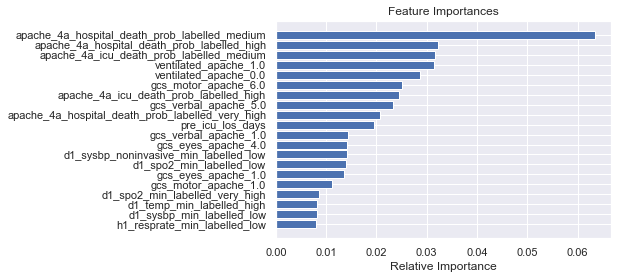

In [99]:
features = X_train.columns
importances = model_rf1.feature_importances_
indices = np.argsort(importances)[-20:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [100]:
feature_imp_df = pd.DataFrame({'Column':X_train.columns,
                               'Feature_importance' :model_rf1.feature_importances_.tolist()})
feature_imp_df.sort_values("Feature_importance", ascending = False)

,Column,Feature_importance
130,apache_4a_hospital_death_prob_labelled_medium,6.340892e-02
128,apache_4a_hospital_death_prob_labelled_high,3.233496e-02
135,apache_4a_icu_death_prob_labelled_medium,3.174117e-02
70,ventilated_apache_1.0,3.150549e-02
69,ventilated_apache_0.0,2.857733e-02
55,gcs_motor_apache_6.0,2.505633e-02
133,apache_4a_icu_death_prob_labelled_high,2.441228e-02
64,gcs_verbal_apache_5.0,2.334863e-02
132,apache_4a_hospital_death_prob_labelled_very_high,2.063076e-02
1,pre_icu_los_days,1.960103e-02


**Random Forest Model Metrics**

In [101]:
# performing predictions on the test dataset
y_pred_rf = model_rf1.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_rf))

ACCURACY OF THE MODEL:  0.7839818089944416


In [102]:
# Metrics
y_pred_values_rf = y_pred_rf.tolist()
len(y_pred_values_rf)

y_test_values = y_test.tolist()
len(y_test_values)

precision, recall, fscore, support = score(y_test_values, y_pred_values_rf)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.76353965 0.80634921]
recall: [0.81182519 0.75707899]
fscore: [0.78694244 0.78093774]


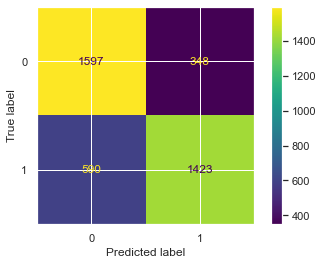

In [103]:
confusion_matrix = metrics.confusion_matrix(y_test_values, y_pred_values)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

**Dimensionality Reduction - Part 2**

In [46]:
#Getting important features from above R classifier
colname = []
for i in indices:
    colname.append(data.columns[i])
    
print(colname)

['h1_resprate_min_labelled_low', 'intubated_apache_1.0', 'd1_spo2_min_labelled_low', 'd1_sysbp_min_labelled_low', 'gcs_motor_apache_1.0', 'h1_sysbp_noninvasive_min_labelled_low', 'gcs_verbal_apache_1.0', 'gcs_eyes_apache_4.0', 'd1_sysbp_noninvasive_min_labelled_low', 'apache_4a_hospital_death_prob_labelled_very_high', 'gcs_eyes_apache_1.0', 'apache_4a_icu_death_prob_labelled_high', 'gcs_motor_apache_6.0', 'apache_4a_icu_death_prob_labelled_medium', 'gcs_verbal_apache_5.0', 'pre_icu_los_days', 'ventilated_apache_0.0', 'apache_4a_hospital_death_prob_labelled_high', 'ventilated_apache_1.0', 'apache_4a_hospital_death_prob_labelled_medium']


**Extracting only the Important Columns for the next few models**

In [47]:
data2 = data[['d1_temp_max_labelled_medium', 'h1_resprate_min_labelled_low', 'gcs_verbal_apache_1.0', 'd1_spo2_min_labelled_very_high', 'd1_diasbp_noninvasive_min_labelled_low', 'gcs_motor_apache_1.0', 'd1_spo2_min_labelled_low', 'gcs_eyes_apache_4.0', 'gcs_eyes_apache_1.0', 'd1_sysbp_noninvasive_min_labelled_low', 'gcs_motor_apache_6.0', 'apache_4a_hospital_death_prob_labelled_very_high', 'ventilated_apache_1.0', 'apache_4a_icu_death_prob_labelled_high', 'ventilated_apache_0.0', 'gcs_verbal_apache_5.0', 'pre_icu_los_days', 'apache_4a_hospital_death_prob_labelled_high', 'apache_4a_icu_death_prob_labelled_medium', 'apache_4a_hospital_death_prob_labelled_medium']]
data2.head()

,d1_temp_max_labelled_medium,h1_resprate_min_labelled_low,gcs_verbal_apache_1.0,d1_spo2_min_labelled_very_high,d1_diasbp_noninvasive_min_labelled_low,gcs_motor_apache_1.0,d1_spo2_min_labelled_low,gcs_eyes_apache_4.0,gcs_eyes_apache_1.0,d1_sysbp_noninvasive_min_labelled_low,gcs_motor_apache_6.0,apache_4a_hospital_death_prob_labelled_very_high,ventilated_apache_1.0,apache_4a_icu_death_prob_labelled_high,ventilated_apache_0.0,gcs_verbal_apache_5.0,pre_icu_los_days,apache_4a_hospital_death_prob_labelled_high,apache_4a_icu_death_prob_labelled_medium,apache_4a_hospital_death_prob_labelled_medium
68323,1,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0.140754,1,0,0
7831,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0.142784,0,1,1
84989,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0.143541,0,1,1
82150,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0.141928,0,1,1
43990,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0.143902,0,1,1


In [75]:
X = data2
y = target_column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


**Correlation Heat Map for New Reduced Training Data**

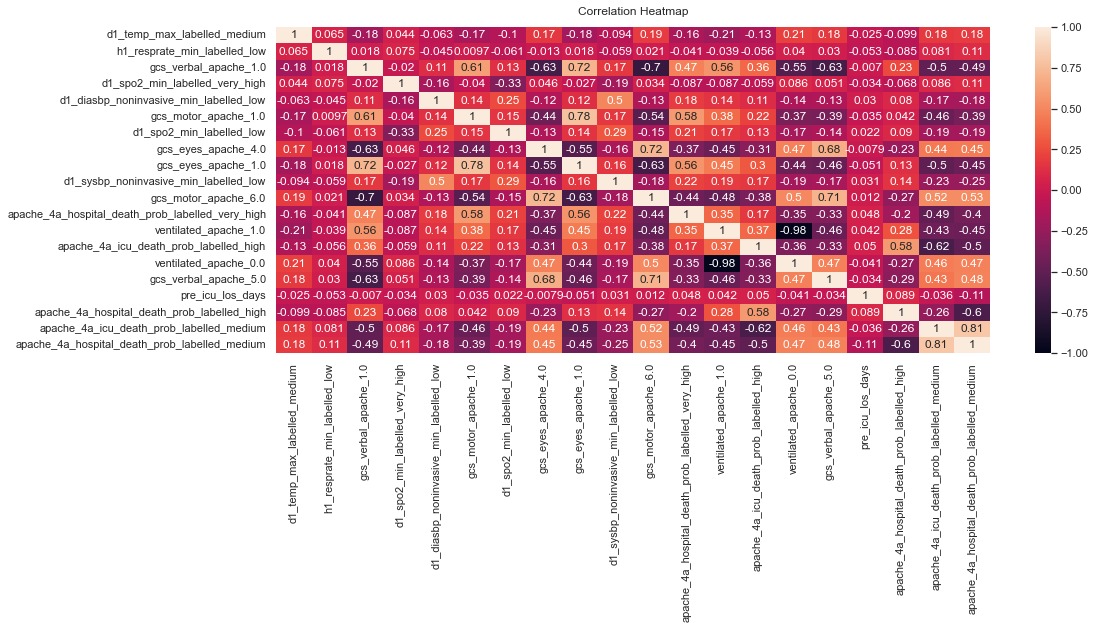

In [68]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Decision Tree

**Building a Decision Tree with only the Important varaibles identified by the Random Forest model. This is done in order to avoid Overfitting caused by Decision Trees.**

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf = 4, min_samples_split=9)
# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dtree.predict(X_test)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))


Accuracy: 0.763011622031329


**Decision Tree Model Metrics**

In [81]:
y_pred_values = y_pred_dt.tolist()
len(y_pred_values)

y_test_values = y_test.tolist()
len(y_test_values)

# predicted = [1,2,3,4,5,1,2,1,1,4,5] 
# y_test = [1,2,3,4,5,1,2,1,1,4,1]

precision, recall, fscore, support = score(y_test_values, y_pred_values)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("Test Performance:",metrics.classification_report(y_test_values, y_pred_values),sep="\n")

precision: [0.73022405 0.80350085]
recall: [0.82107969 0.70690512]
fscore: [0.77299129 0.75211416]
support: [1945 2013]
Test Performance:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1945
           1       0.80      0.71      0.75      2013

    accuracy                           0.76      3958
   macro avg       0.77      0.76      0.76      3958
weighted avg       0.77      0.76      0.76      3958



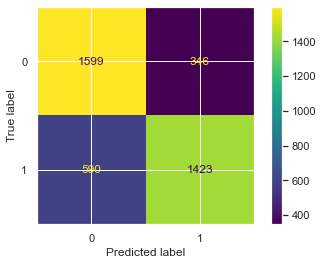

In [73]:
confusion_matrix = metrics.confusion_matrix(y_test_values, y_pred_values)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

**Naive Bayes Model**

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred=clf.predict(X_test)

y_pred_values = y_pred.tolist()
len(y_pred_values)

y_test_values = y_test.tolist()
len(y_test_values)

precision, recall, fscore, support = score(y_test_values, y_pred_values)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.70115434 0.81161211]
recall: [0.84318766 0.65275708]
fscore: [0.76563959 0.72356828]


**Support Vector Machine**

In [112]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf')
model_svc.fit(X_train, y_train)


SVC()

In [113]:
y_pred_svm = model_svc.predict(X_test)


In [114]:
from sklearn import metrics
print("f1-score = ", metrics.f1_score(y_pred_svm, y_test))
print("Precision score = ", metrics.precision_score(y_pred_svm, y_test))
print("Recall score = ", metrics.recall_score(y_pred_svm, y_test))
print("Test Performance:",metrics.classification_report(y_pred_svm,y_test),sep="\n")

f1-score =  0.7569553805774278
Precision score =  0.7163437655240934
Recall score =  0.8024485253199778
Test Performance:
              precision    recall  f1-score   support

           0       0.82      0.74      0.77      2161
           1       0.72      0.80      0.76      1797

    accuracy                           0.77      3958
   macro avg       0.77      0.77      0.77      3958
weighted avg       0.77      0.77      0.77      3958



**SVM Hyper Parameter Tuning**

In [33]:
paramGrid = [{'C':[0.1,0.5,1,10,100,1000],
'gamma':['scale',1,0.1,0.01,0.001,0.0001],
'kernel':['rbf']}]

In [34]:
from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(
    SVC(),
    paramGrid,
    cv=5,
    scoring ='accuracy',
    verbose=0
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}


In [158]:
model_opt = SVC(C=0.5, gamma= 'scale', kernel='rbf')
model_opt.fit(X_train, y_train)

SVC(C=0.5)

In [160]:
y_pred_svc_final = model_opt.predict(X_test)
print("f1-score = ", metrics.f1_score(y_pred_svc_final, y_test))
print("Precision score = ", metrics.precision_score(y_pred_svc_final, y_test))
print("Recall score = ", metrics.recall_score(y_pred_svc_final, y_test))
print("Test Performance:",metrics.classification_report(y_pred_svc_final,y_test),sep="\n")

f1-score =  0.7564439768542872
Precision score =  0.7143566815697964
Recall score =  0.8038010061486864
Test Performance:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      2169
           1       0.71      0.80      0.76      1789

    accuracy                           0.77      3958
   macro avg       0.77      0.77      0.77      3958
weighted avg       0.77      0.77      0.77      3958



**Artificial Neural Networks**

In [41]:
import tensorflow as tf

In [46]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [47]:
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))

In [48]:
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))

In [49]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [51]:
# compile the model
ann.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann.build(X_train.shape) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (11872, 16)               336       
                                                                 
 dense_4 (Dense)             (11872, 16)               272       
                                                                 
 dense_5 (Dense)             (11872, 1)                17        
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [53]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

In [57]:
# now we just update our model fit call
history = ann.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
950/950 [==============================] - 2s 2ms/step - loss: 0.5137 - accuracy: 0.7550 - val_loss: 0.4799 - val_accuracy: 0.7676
Epoch 2/80
950/950 [==============================] - 1s 1ms/step - loss: 0.4876 - accuracy: 0.7745 - val_loss: 0.4815 - val_accuracy: 0.7726
Epoch 3/80
950/950 [==============================] - 1s 1ms/step - loss: 0.4835 - accuracy: 0.7737 - val_loss: 0.4761 - val_accuracy: 0.7705
Epoch 4/80
950/950 [==============================] - 1s 1ms/step - loss: 0.4826 - accuracy: 0.7767 - val_loss: 0.4781 - val_accuracy: 0.7747
Epoch 5/80
950/950 [==============================] - 1s 1ms/step - loss: 0.4811 - accuracy: 0.7770 - val_loss: 0.4767 - val_accuracy: 0.7781
Epoch 6/80
950/950 [==============================] - 1s 1ms/step - loss: 0.4792 - accuracy: 0.7782 - val_loss: 0.4795 - val_accuracy: 0.7773
Epoch 7/80
950/950 [==============================] - 1s 1ms/step - loss: 0.4790 - accuracy: 0.7795 - val_loss: 0.4767 - val_accuracy: 0.7756
Epoch 

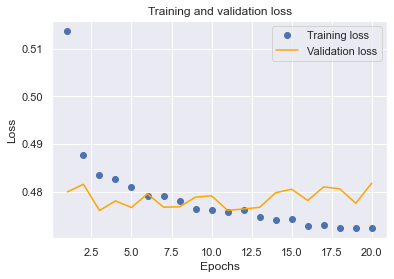

In [58]:
import matplotlib.pyplot as plt

history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
#ann.predict(X_test) # prob of successes (survival)
#np.round(ann.predict(X_test),0) # 1 and 0 (survival or not)
#y_Test # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
y_pred_ann = np.round(ann.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, y_pred_ann)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_test, y_pred_ann))

124/124 [==============================] - 0s 836us/step
[[1544  401]
 [ 532 1481]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1945
           1       0.79      0.74      0.76      2013

    accuracy                           0.76      3958
   macro avg       0.77      0.76      0.76      3958
weighted avg       0.77      0.76      0.76      3958



**XG Boost**

In [61]:
import xgboost as xgb

In [62]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [64]:
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train, y_train)
print(xg_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [65]:
expected_y  = y_test
predicted_y_xgb = xg_model.predict(X_test)

In [66]:
print(metrics.classification_report(expected_y, predicted_y_xgb))
print(metrics.confusion_matrix(expected_y, predicted_y_xgb))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1945
           1       0.79      0.72      0.75      2013

    accuracy                           0.76      3958
   macro avg       0.76      0.76      0.76      3958
weighted avg       0.76      0.76      0.76      3958

[[1553  392]
 [ 557 1456]]


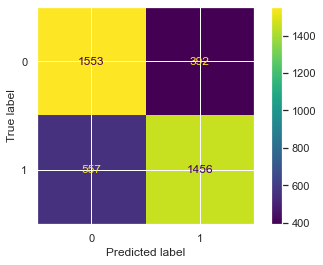

In [67]:
confusion_matrix = metrics.confusion_matrix(y_test_values, predicted_y_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# Combining all models

From the above models, the best models were Support Vector Machine, RF, Artificial Neural Networks, XG Boost and Decision Trees

Performing a custom Ensemble model

In [119]:
# Decision Tree: y_pred_dt
# RF: y_pred_rf
# SVM: y_pred_svc_final
# ANN: y_pred_ann
# XG Boost: predicted_y_xgb
print(type(y_pred_dt))
print(type(y_pred_rf))
print(type(y_pred_svc_final))
print(type(y_pred_ann))
print(type(predicted_y_xgb))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [150]:
y_pred_ensemble = y_pred_rf + y_pred_svc_final + predicted_y_xgb

In [151]:
y_pred_ens_bin = np.where(y_pred_ensemble <3, 0, 1)

In [152]:
y_pred_ens_bin

array([0, 0, 1, ..., 1, 0, 0])

In [153]:
#print(metrics.classification_report(expected_y, y_pred_ens_bin))
expected_y_np = expected_y.to_numpy()

In [154]:
y_pred_ens_bin = y_pred_ens_bin.ravel()

In [157]:
print(metrics.classification_report(expected_y_np, y_pred_svc_final))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1945
           1       0.80      0.71      0.76      2013

    accuracy                           0.77      3958
   macro avg       0.77      0.77      0.77      3958
weighted avg       0.77      0.77      0.77      3958



# Conclusion

1. We have built five models and displayed the recall scores of all the models. 
2. We also tried to combine the results of all the five models but ended up getting a lesser accuracy score than the Support Vector Machine Model.

Finally, we can conclude that the Support vector machine model would be able to predict the Survival Chances of ICU patients with a recall of 80.38%.